# Principal Component Analysis (PCA) Walkthrough (Low Gravity)

Principal Component Analysis (PCA) is a dimensionality-reduction technique that transforms high-dimensional data into a new coordinate system of orthogonal components, which are linear combinations of the original features.


In [12]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pathlib import Path

In [13]:
# this is the path to your pickle file (should be the same location as CSVs)
path = Path('../../CSV')

with open(path / 'low_g.pkl', 'rb') as file:
    df = pickle.load(file)

## Data Preprocessing

PCA is sensitive to data scale. Hence, we'll normalize our data to have a mean = 0 and variance = 1.


In [14]:
features = df.drop('LOW-G', axis=1).columns
X = df.drop('LOW-G', axis=1).values
X = StandardScaler().fit_transform(X)

## Applying PCA

We will first compute PCA without reducing the dimensionality to understand the explained variance by each component.

In [15]:
pca = PCA()
principalComponents = pca.fit_transform(X)

## Visualize Component Variance

Visualizing explained variance informs us how many components might be necessary.

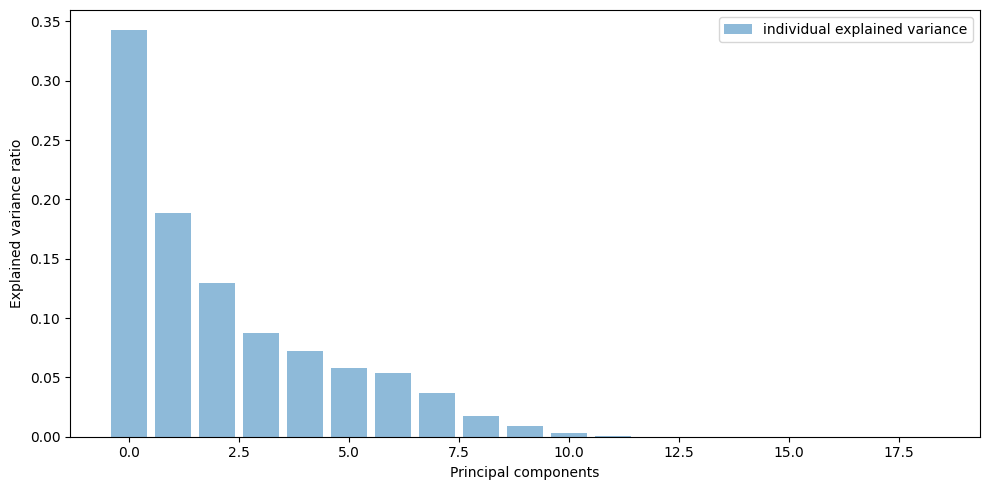

In [16]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

## Scree Plot

The scree plot helps to visualize the proportion of variance explained by each component, making it easier to choose the right number of components.

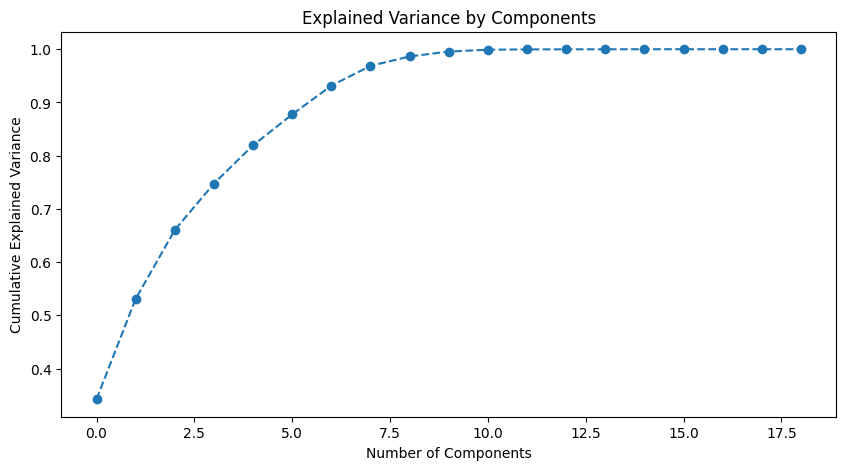

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

## Feature Loadings

Let's explore how each original feature contributes to the principal components.


In [18]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(features) + 1)], index=features)
display(loadings)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Altitude(MSL),0.235249,0.299356,0.258965,-0.158765,0.038367,-0.137144,-0.163405,-0.313721,-0.123570,0.772745,0.041985,-0.003261,0.007249,-0.045369,-0.028439,0.016584,1.119185e-16,0.0,-0.0
Altitude(AGL),-0.297983,-0.254969,-0.263175,0.134790,-0.046012,0.119944,0.136406,0.225933,0.001619,0.424717,0.007873,-0.012049,-0.499036,-0.347263,-0.038391,0.347728,3.628017e-16,0.0,-0.0
Airspeed(True),0.382150,0.058906,0.229499,0.038609,-0.002174,0.003095,0.062166,0.138568,0.064953,-0.139328,0.000051,0.014416,0.112786,0.100141,0.047539,0.851119,5.835566e-16,0.0,-0.0
Roll Acceleration,0.262758,-0.248319,0.032435,0.254055,-0.063577,0.156938,0.283974,0.522145,0.094697,0.389776,0.004711,-0.036918,0.384282,0.224977,-0.011801,-0.247075,-2.687198e-17,0.0,-0.0
Pitch Acceleration,0.209631,0.258980,-0.480106,0.001025,-0.025927,0.021927,0.008167,0.054617,-0.001160,0.001824,0.497528,0.637463,0.014486,0.009858,-0.006705,-0.005416,-2.035421e-16,0.0,-0.0
Yaw Acceleration,0.228910,0.273808,-0.448103,-0.009599,-0.020822,0.008832,-0.001178,0.031771,-0.001120,-0.031525,0.299496,-0.760759,-0.024692,-0.001749,0.011555,0.004987,2.382811e-16,0.0,-0.0
Roll,-0.110082,0.184209,0.012038,0.562279,0.339299,-0.119831,-0.263514,-0.072157,0.655914,0.056321,-0.003859,0.001090,-0.003826,0.006815,0.006637,-0.001298,8.845400e-18,0.0,-0.0
Pitch,0.009274,0.079027,0.071150,-0.075763,0.101040,0.900313,-0.402056,0.019272,-0.004559,0.004234,-0.003439,-0.002265,0.003500,0.001396,-0.000668,-0.001680,4.860341e-18,0.0,-0.0
Yaw,0.215958,0.280775,-0.444204,-0.018133,-0.028905,0.006399,0.001017,0.046277,-0.005339,0.035910,-0.812768,0.109309,-0.001029,-0.001023,0.000619,0.001202,-5.066988e-17,0.0,-0.0
Rotor RPM-[0],-0.037433,-0.024166,-0.024675,-0.243048,0.694110,-0.238743,-0.297826,0.493621,-0.258809,-0.001049,0.003304,-0.001025,-0.004702,0.006147,0.011285,-0.000946,1.381914e-17,0.0,-0.0


## Visualizing First Two Principal Components

A 2D scatter plot provides a visualization of data in the new component space.

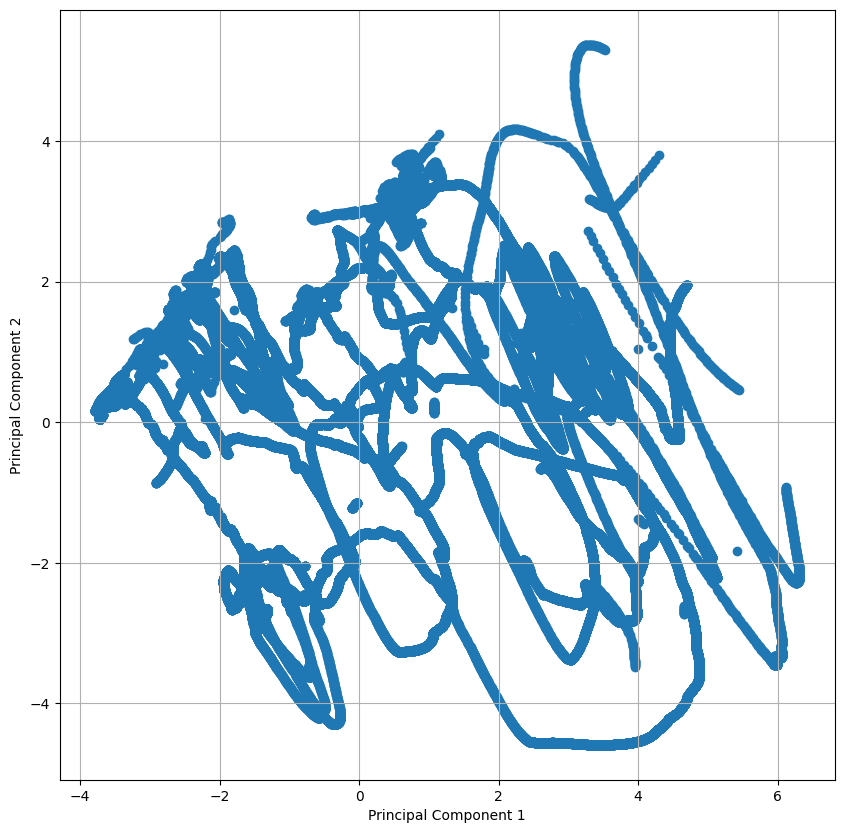

In [19]:
principal_df = pd.DataFrame(data=principalComponents, columns=[f'PC{i}' for i in range(1, len(features) + 1)])

plt.figure(figsize=(10, 10))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Conclusion

Based on the results of our PCA analysis, we can derive the following key points:

1. **Variance Explained by Individual Components**: The first principal component accounted for 34% of the variance, and the second component explained approximately 18%. These figures indicate that while there's some notable structure in the data, no single trend or pattern overwhelmingly dominates.

2. **Scree Plot Interpretation**: The scree plot suggests a leveling off after the 8th component. This implies that the majority of the dataset's variance can be captured using these initial 8 components. If the goal is dimensionality reduction or simplification for future analyses, it might be prudent to focus on these 8 components.

3. **No Clear Linearity**: The scatter plot visualization of the first two principal components did not reveal any obvious linear relationships. This observation highlights the potential complexity in the dataset, suggesting that linear models might not capture its nuances effectively.

In light of these insights, for dimensionality reduction purposes, we might consider working with the initial 8 components. However, the absence of clear linear patterns in the first two components emphasizes the importance of exercising caution when employing linear modeling techniques on the reduced dataset. Given this complexity, there's merit in exploring non-linear models or alternative dimensionality reduction techniques to uncover more intricate relationships within the data.